## For Covid-related questions

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

In [16]:
# Global settings for plot display
import matplotlib_inline.backend_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg') # display figures in vector format
plt.rcParams.update({'font.size':12,             # font size
                     'axes.titlelocation':'left',# title location
                     'axes.spines.right':False,  # remove axis bounding box
                     'axes.spines.top':False,    # remove axis bounding box
                     })


In [17]:
df = pd.read_csv('data/covid.csv')
df.head()

,gender,batch,avg_pre_covid_use,avg_post_covid_use
0,F,Final,8 or more hrs per day,8 or more hrs per day
1,M,Final,4 to 6 hrs per day,4 to 6 hrs per day
2,M,Final,6 to 8 hrs per day,6 to 8 hrs per day
3,F,Final,4 to 6 hrs per day,6 to 8 hrs per day
4,F,Final,2 to 4 hrs per day,4 to 6 hrs per day


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194 entries, 0 to 193
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   gender              194 non-null    object
 1   batch               194 non-null    object
 2   avg_pre_covid_use   190 non-null    object
 3   avg_post_covid_use  191 non-null    object
dtypes: object(4)
memory usage: 6.2+ KB


In [19]:
df.describe()

,gender,batch,avg_pre_covid_use,avg_post_covid_use
count,194,194,190,191
unique,2,2,5,5
top,M,First,0 to 2 hrs per day,2 to 4 hrs per day
freq,117,139,53,53


Lets make the values easier:

In [20]:
use_map = {'0 to 2 hrs per day': '0-2 hrs',
        '2 to 4 hrs per day': '2-4 hrs',
        '4 to 6 hrs per day': '4-6 hrs',
        '6 to 8 hrs per day': '6-8 hrs',
        '8 or more hrs per day': '>8 hrs',
}


In [21]:
df['avg_pre_covid_use'] = df['avg_pre_covid_use'].fillna('No data').replace(use_map)
df['avg_post_covid_use'] = df['avg_post_covid_use'].fillna('No data').replace(use_map)

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194 entries, 0 to 193
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   gender              194 non-null    object
 1   batch               194 non-null    object
 2   avg_pre_covid_use   194 non-null    object
 3   avg_post_covid_use  194 non-null    object
dtypes: object(4)
memory usage: 6.2+ KB


In [23]:
df.head()

,gender,batch,avg_pre_covid_use,avg_post_covid_use
0,F,Final,>8 hrs,>8 hrs
1,M,Final,4-6 hrs,4-6 hrs
2,M,Final,6-8 hrs,6-8 hrs
3,F,Final,4-6 hrs,6-8 hrs
4,F,Final,2-4 hrs,4-6 hrs


Thats cleaner

## Changes in usage

In [24]:
pre_counts = df['avg_pre_covid_use'].value_counts().sort_index()
pre_counts 

avg_pre_covid_use
0-2 hrs    53
2-4 hrs    50
4-6 hrs    48
6-8 hrs    23
>8 hrs     16
No data     4
Name: count, dtype: int64

In [25]:
post_counts = df['avg_post_covid_use'].value_counts().sort_index()
post_counts

avg_post_covid_use
0-2 hrs    19
2-4 hrs    53
4-6 hrs    50
6-8 hrs    41
>8 hrs     28
No data     3
Name: count, dtype: int64

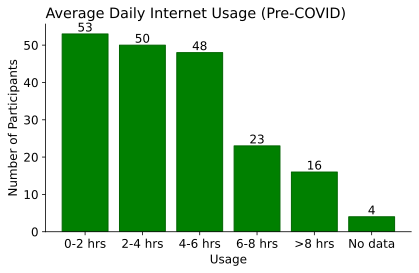

In [26]:
# plot
plt.figure(figsize=(6, 4))
bars = plt.bar(pre_counts.index, pre_counts.values, color='green', edgecolor='darkgreen')

# bar value labels
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, 
             f'{height}', ha='center', va='bottom')

# labels etc
plt.title('Average Daily Internet Usage (Pre-COVID)')
plt.xlabel('Usage')
plt.ylabel('Number of Participants')

# adjust layout and show
plt.tight_layout()
plt.show()

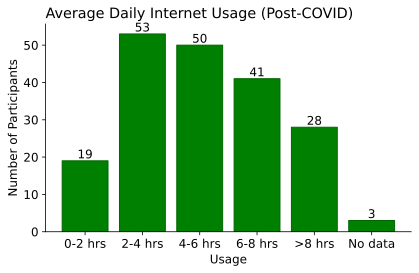

In [27]:
# plot
plt.figure(figsize=(6, 4))
bars = plt.bar(post_counts.index, post_counts.values, color='green', edgecolor='darkgreen')

# bar value labels
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, 
             f'{height}', ha='center', va='bottom')

# labels etc
plt.title('Average Daily Internet Usage (Post-COVID)')
plt.xlabel('Usage')
plt.ylabel('Number of Participants')

# adjust layout and show
plt.tight_layout()
plt.show()

There is a marked shift from less to more hours per day.

#### Differences

In [28]:
df['avg_post_covid_use'].unique()

array(['>8 hrs', '4-6 hrs', '6-8 hrs', '0-2 hrs', '2-4 hrs', 'No data'],
      dtype=object)

In [29]:
cat_dict = {'0-2 hrs': 1,
           '2-4 hrs': 2,
           '4-6 hrs': 3,
           '6-8 hrs': 4,
           '>8 hrs': 5,}

df['avg_pre_covid_use_code'] = df['avg_pre_covid_use'].replace(cat_dict).fillna('No data')
df['avg_post_covid_use_code'] = df['avg_post_covid_use'].replace(cat_dict).fillna('No data')
df.head()

,gender,batch,avg_pre_covid_use,avg_post_covid_use,avg_pre_covid_use_code,avg_post_covid_use_code
0,F,Final,>8 hrs,>8 hrs,5,5
1,M,Final,4-6 hrs,4-6 hrs,3,3
2,M,Final,6-8 hrs,6-8 hrs,4,4
3,F,Final,4-6 hrs,6-8 hrs,3,4
4,F,Final,2-4 hrs,4-6 hrs,2,3


In [30]:
def change(row):
    if row['avg_pre_covid_use_code'] == 'No data' or row['avg_post_covid_use_code'] == 'No data':
        return 'No data'
    elif row['avg_pre_covid_use_code'] == row['avg_post_covid_use_code']:
        return 'No Change'
    elif row['avg_pre_covid_use_code'] < row['avg_post_covid_use_code']:
        return 'Increased'
    else:
        return 'Decreased'


In [31]:
df['use_change'] = df.apply(change, axis=1)
df.head()

,gender,batch,avg_pre_covid_use,avg_post_covid_use,avg_pre_covid_use_code,avg_post_covid_use_code,use_change
0,F,Final,>8 hrs,>8 hrs,5,5,No Change
1,M,Final,4-6 hrs,4-6 hrs,3,3,No Change
2,M,Final,6-8 hrs,6-8 hrs,4,4,No Change
3,F,Final,4-6 hrs,6-8 hrs,3,4,Increased
4,F,Final,2-4 hrs,4-6 hrs,2,3,Increased


In [32]:
change_counts = df['use_change'].value_counts()
change_counts

use_change
Increased    93
No Change    68
Decreased    29
No data       4
Name: count, dtype: int64

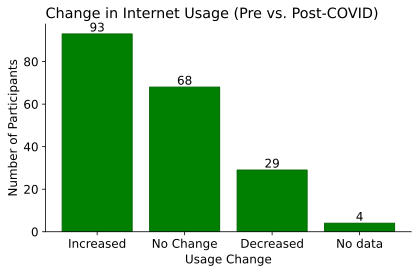

In [33]:
# plot
plt.figure(figsize=(6, 4))
bars = plt.bar(change_counts.index, change_counts.values, color='green', edgecolor='darkgreen')

# bar value labels
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height,
             f'{height}', ha='center', va='bottom')

# labels etc
plt.title('Change in Internet Usage (Pre vs. Post-COVID)')
plt.xlabel('Usage Change')
plt.ylabel('Number of Participants')

# adjust layout and show
plt.tight_layout()
plt.show()

a pie chart would also give a good sense of the proportion too:

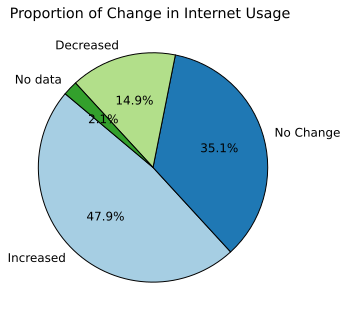

In [35]:
# plot
plt.figure(figsize=(5, 5))
wedges, texts, autotexts = plt.pie(change_counts, labels=change_counts.index, 
                        autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors,
                        labeldistance=1.1, wedgeprops=dict(linewidth=1, edgecolor='black'))

# title
plt.title('Proportion of Change in Internet Usage ')

# adjust layout and show
plt.tight_layout()
plt.show()

so overall there was more of increases than decreasing or no change. Here's the OG version: ![Pie chart of change](images/covid_change.png)

That difference in `No Response` category is due to us counting even one `NA` value as `No data` in the `use_change` column while the OG sheet considered it as an `Increase` due to the `post_covid` value being present. but still, not bad. visualising proportion was a good choice here.

Group comparisons:

In [38]:
change_grp = df.groupby(['use_change', 'batch']).size().unstack().sort_values(['Final', 'First'], ascending=False)
change_grp

batch,Final,First
use_change,,
No Change,25,43
Increased,22,71
Decreased,7,22
No data,1,3


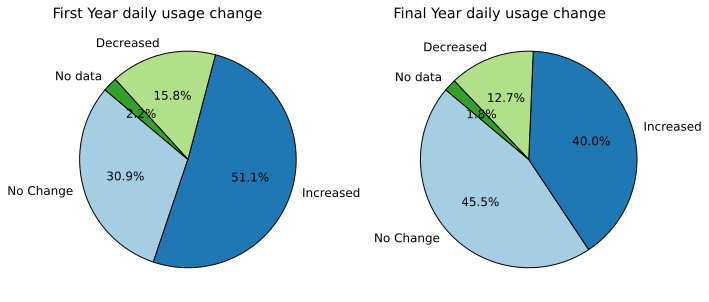

In [39]:
# plot
fig, axs = plt.subplots(1, 2, figsize=(10, 4.5), sharey=True)

# First pie (First years)
axs[0].pie(change_grp['First'], labels=change_grp.index, autopct='%1.1f%%', startangle=140,
           colors=plt.cm.Paired.colors, labeldistance=1.1, wedgeprops=dict(linewidth=1, edgecolor='black'))
axs[0].set_title('First Year daily usage change')

# Second pie (Final years)
axs[1].pie(change_grp['Final'], labels=change_grp.index, autopct='%1.1f%%', startangle=140,
           colors=plt.cm.Paired.colors, labeldistance=1.1, wedgeprops=dict(linewidth=1, edgecolor='black'))
axs[1].set_title('Final Year daily usage change')

# Adjust layout and show
plt.tight_layout()
plt.show()

by group a increase is more prevalent in First years than final years. lets look at the OG pies: ![Batch comparison pies](images/covid_change_comparison.png)

Not bad, except for the usual visual confusion.

Now gender:

In [42]:
change_gender = df.groupby(['use_change', 'gender']).size().unstack().sort_values(['F', 'M'], ascending=False).fillna(0)
change_gender

gender,F,M
use_change,,
Increased,46.0,47.0
No Change,20.0,48.0
Decreased,11.0,18.0
No data,0.0,4.0


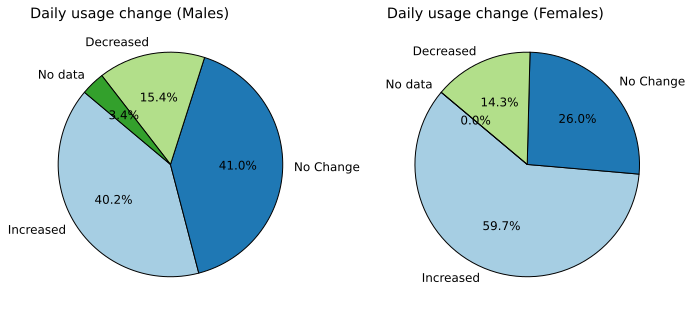

In [43]:
# plot
fig, axs = plt.subplots(1, 2, figsize=(10, 4.5), sharey=True)

# First pie (Males)
axs[0].pie(change_gender['M'], labels=change_gender.index, autopct='%1.1f%%', startangle=140,
           colors=plt.cm.Paired.colors, labeldistance=1.1, wedgeprops=dict(linewidth=1, edgecolor='black'))
axs[0].set_title('Daily usage change (Males)')

# Second pie (Females)
axs[1].pie(change_gender['F'], labels=change_gender.index, autopct='%1.1f%%', startangle=140,
           colors=plt.cm.Paired.colors, labeldistance=1.1, wedgeprops=dict(linewidth=1, edgecolor='black'))
axs[1].set_title('Daily usage change (Females)')

# Adjust layout and show
plt.tight_layout()
plt.show()

So an increase was seen more in females than males. 